# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm
from tqdm import trange
import multiprocessing as mp
from sklearn.model_selection import train_test_split as tts
%matplotlib inline       

In [2]:
zf=zipfile.ZipFile('data_all.zip')

labo=pd.read_csv(zf.open('data_all.csv'))

labo.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
labo.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 696.7 MB


In [4]:
len(labo.select_dtypes('float').columns)

785

In [5]:
with tqdm(total=len(labo.select_dtypes('float').columns)) as pbar:      
    for e in labo.select_dtypes('float').columns:
        labo[e]=pd.to_numeric(labo[e], downcast='float')
        pbar.update(1)
labo.info(memory_usage='deep')

100%|██████████| 785/785 [04:35<00:00,  2.85it/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float32(785)
memory usage: 348.3 MB


In [6]:
labo.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
labo.shape

(116322, 785)

In [8]:
matriz_datos=labo.values

In [9]:
labo[labo.e == 61].head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
134,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
622,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


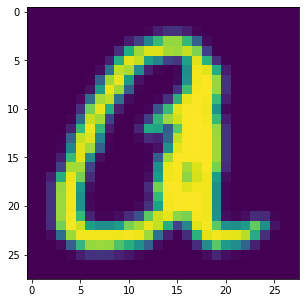

In [10]:
plt.figure(figsize=(5,5))
plt.imshow(matriz_datos[0,1:].reshape(28,28))  
plt.show()

In [11]:
labo.e.value_counts()

1.0     6330
7.0     6139
3.0     5969
2.0     5869
0.0     5778
        ... 
41.0     400
20.0     382
60.0     381
51.0     368
45.0     317
Name: e, Length: 62, dtype: int64

In [12]:
lista = labo.e.value_counts().index.tolist()

In [13]:
len(lista)

62

In [14]:
print(lista)

[1.0, 7.0, 3.0, 2.0, 0.0, 6.0, 9.0, 8.0, 4.0, 5.0, 24.0, 40.0, 28.0, 55.0, 47.0, 53.0, 18.0, 30.0, 49.0, 12.0, 39.0, 36.0, 29.0, 22.0, 43.0, 15.0, 25.0, 23.0, 10.0, 37.0, 14.0, 21.0, 27.0, 32.0, 34.0, 31.0, 13.0, 11.0, 19.0, 42.0, 17.0, 52.0, 56.0, 59.0, 57.0, 58.0, 46.0, 50.0, 35.0, 48.0, 61.0, 16.0, 54.0, 38.0, 33.0, 44.0, 26.0, 41.0, 20.0, 60.0, 51.0, 45.0]


In [15]:
def cate(x):
    if 0<=x<=9:
        return 0
    if 10<=x<=35:
        return 1
    if 36<=x<=61:
        return 2

In [16]:
labo['nMm'] = labo.e.apply(cate)

In [17]:
labo.nMm.value_counts()

0    57918
1    31345
2    27059
Name: nMm, dtype: int64

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [18]:
mayus = labo[labo.nMm == 1]

In [19]:
mayus.head()

,e,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,nMm
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
16,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [20]:
X_train, X_test, y_train, y_test = tts(mayus.drop(['e','nMm'], axis=1), mayus.e, test_size=.2)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25076, 784)
(25076,)
(6269, 784)
(6269,)


In [22]:
from sklearn.linear_model import SGDClassifier as SGDC
sgdc=SGDC()
sgdc.fit(X_train, y_train)
train_score=sgdc.score(X_train, y_train) # Accuracy
test_score=sgdc.score(X_test, y_test)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.791952464507896 -- test Acc: 0.7203700749720848


In [23]:
from sklearn.naive_bayes import GaussianNB as GNB
gnb=GNB()
gnb.fit(X_train, y_train)
train_score=gnb.score(X_train, y_train) # Accuracy
test_score=gnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.5276359866007337 -- test Acc: 0.5179454458446323


In [24]:
from sklearn.naive_bayes import MultinomialNB as MNB
mnb=MNB()
mnb.fit(X_train, y_train)
train_score=mnb.score(X_train, y_train) # Accuracy
test_score=mnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.6957648747806667 -- test Acc: 0.6913383314723242


In [25]:
from sklearn.naive_bayes import ComplementNB as CNB
cnb=CNB()
cnb.fit(X_train, y_train)
train_score=cnb.score(X_train, y_train) # Accuracy
test_score=cnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.49589248684000636 -- test Acc: 0.4994416972403892


In [26]:
from sklearn.naive_bayes import BernoulliNB as BNB
bnb=BNB()
bnb.fit(X_train, y_train)
train_score=bnb.score(X_train, y_train) # Accuracy
test_score=bnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.6964428138459084 -- test Acc: 0.6956452384750359


In [27]:
mayusculas = pd.DataFrame()
y_test.reset_index(drop=True, inplace=True)

In [28]:
mayusculas['sgdc'] = sgdc.predict(X_test)
mayusculas['gnb'] = gnb.predict(X_test)
mayusculas['mnb'] = mnb.predict(X_test)
mayusculas['cnb'] = cnb.predict(X_test)
mayusculas['bnb'] = bnb.predict(X_test)
mayusculas['REAL']=y_test

In [29]:
mayusculas.head()

,sgdc,gnb,mnb,cnb,bnb,REAL
0,23.0,25.0,23.0,23.0,23.0,23.0
1,21.0,21.0,21.0,21.0,21.0,21.0
2,18.0,18.0,18.0,18.0,18.0,18.0
3,15.0,25.0,15.0,29.0,15.0,15.0
4,24.0,24.0,24.0,24.0,24.0,24.0


* Try to do the same thing with lowercases.

In [30]:
minus = labo[labo.nMm == 2]
X_train, X_test, y_train, y_test = tts(minus.drop(['e','nMm'], axis=1), minus.e, test_size=.2)

In [31]:
sgdc=SGDC()
sgdc.fit(X_train, y_train)
train_score=sgdc.score(X_train, y_train) # Accuracy
test_score=sgdc.score(X_test, y_test)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.7735482976855915 -- test Acc: 0.6916112342941612


In [32]:
gnb=GNB()
gnb.fit(X_train, y_train)
train_score=gnb.score(X_train, y_train) # Accuracy
test_score=gnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.4290663833325634 -- test Acc: 0.42590539541759054


In [33]:
mnb=MNB()
mnb.fit(X_train, y_train)
train_score=mnb.score(X_train, y_train) # Accuracy
test_score=mnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.6437843581096688 -- test Acc: 0.6341463414634146


In [34]:
cnb=CNB()
cnb.fit(X_train, y_train)
train_score=cnb.score(X_train, y_train) # Accuracy
test_score=cnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.5141590058668638 -- test Acc: 0.5035107169253511


In [35]:
bnb=BNB()
bnb.fit(X_train, y_train)
train_score=bnb.score(X_train, y_train) # Accuracy
test_score=bnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.6449392525523168 -- test Acc: 0.6359940872135994


In [36]:
minusculas = pd.DataFrame()
y_test.reset_index(drop=True, inplace=True)

In [37]:
minusculas['sgdc'] = sgdc.predict(X_test)
minusculas['gnb'] = gnb.predict(X_test)
minusculas['mnb'] = mnb.predict(X_test)
minusculas['cnb'] = cnb.predict(X_test)
minusculas['bnb'] = bnb.predict(X_test)
minusculas['REAL']=y_test

In [38]:
minusculas.head()

,sgdc,gnb,mnb,cnb,bnb,REAL
0,40.0,40.0,40.0,40.0,40.0,40.0
1,42.0,50.0,50.0,40.0,55.0,55.0
2,43.0,43.0,43.0,43.0,43.0,43.0
3,55.0,58.0,53.0,53.0,53.0,55.0
4,40.0,40.0,40.0,40.0,40.0,40.0


* Try to do the same thing with numbers.

In [39]:
nums = labo[labo.nMm == 0]
X_train, X_test, y_train, y_test = tts(nums.drop(['e','nMm'], axis=1), nums.e, test_size=.2)

In [40]:
sgdc=SGDC()
sgdc.fit(X_train, y_train)
train_score=sgdc.score(X_train, y_train) # Accuracy
test_score=sgdc.score(X_test, y_test)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.8992316657314283 -- test Acc: 0.8863950276243094


In [41]:
gnb=GNB()
gnb.fit(X_train, y_train)
train_score=gnb.score(X_train, y_train) # Accuracy
test_score=gnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.6576596020201149 -- test Acc: 0.6541781767955801


In [42]:
mnb=MNB()
mnb.fit(X_train, y_train)
train_score=mnb.score(X_train, y_train) # Accuracy
test_score=mnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.8173263694047568 -- test Acc: 0.8150897790055248


In [43]:
cnb=CNB()
cnb.fit(X_train, y_train)
train_score=cnb.score(X_train, y_train) # Accuracy
test_score=cnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.7134717486079337 -- test Acc: 0.7121029005524862


In [44]:
bnb=BNB()
bnb.fit(X_train, y_train)
train_score=bnb.score(X_train, y_train) # Accuracy
test_score=bnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.8232615358052402 -- test Acc: 0.8203556629834254


In [45]:
numeros = pd.DataFrame()
y_test.reset_index(drop=True, inplace=True)

In [46]:
numeros['sgdc'] = sgdc.predict(X_test)
numeros['gnb'] = gnb.predict(X_test)
numeros['mnb'] = mnb.predict(X_test)
numeros['cnb'] = cnb.predict(X_test)
numeros['bnb'] = bnb.predict(X_test)
numeros['REAL']=y_test

In [47]:
numeros.head()

,sgdc,gnb,mnb,cnb,bnb,REAL
0,7.0,7.0,7.0,7.0,7.0,7.0
1,6.0,6.0,6.0,6.0,6.0,6.0
2,2.0,9.0,2.0,2.0,2.0,2.0
3,6.0,6.0,6.0,6.0,6.0,6.0
4,3.0,3.0,3.0,3.0,3.0,3.0
